<a href="https://colab.research.google.com/github/suryamhmmd/test_project/blob/main/Budgeting_Recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("test")

In [ ]:
!pip install mysql-connector-python

In [ ]:
import pandas as pd
import numpy as np
import mysql.connector
import random as rd
from random import randint
import matplotlib.pyplot as plt

In [ ]:
mydb = mysql.connector.connect(
  host="haloryan.com",
  user="u6049187_surya",
  password="surya",
  database="u6049187_surya"
)

#Fetch data list item
cur_item = mydb.cursor()
cur_item.execute("SELECT * FROM item")
res_item = cur_item.fetchall()

#Fetch data divisi
cur_divisi = mydb.cursor()
cur_divisi.execute("SELECT * FROM divisi")
res_divisi = cur_divisi.fetchall()

In [ ]:
df = pd.DataFrame(res_item)
df =df.rename(columns = {0:'id', 1:'inout', 2:'item kategori', 3:'divisi', 4:'item', 5:'jumlah', 6:'satuan', 7:'harga', 8:'total_harga',9:'value'})
#Menampilkan tabel lit item
df

,id,inout,item kategori,divisi,item,jumlah,satuan,harga,total_harga,value
0,1,2,1,1,MOTIVATOR Low,1,ORANG,1000000,1000000,900
1,2,2,1,1,MOTIVATOR Med,1,ORANG,5000000,5000000,800
2,3,2,1,1,MOTIVATOR High,1,ORANG,20000000,20000000,500
3,4,2,2,1,GUEST STAR Low,1,Band,2500000,2500000,1000
4,5,2,2,1,GUEST STAR Mid,1,Band,10000000,10000000,700
...,...,...,...,...,...,...,...,...,...,...
106,107,2,46,6,BORDER LINE,2,PCS,200000,400000,1000
107,108,2,47,6,MOCKUP (A2),6,PCS,10000,60000,900
108,109,2,48,6,CUE CARD,2,LEMBAR,5000,10000,800
109,110,2,49,6,GREEN SCREEN,1,PCS,50000,50000,700


In [ ]:
#menghitung jumlah item indoor/outdoor/keduanya
df['inout'].value_counts()

2    95
0     9
1     7
Name: inout, dtype: int64

In [ ]:
#Memilih id unique dari tabel item berdasarkan item kategori
arr_kat = df['item kategori'].unique()
by_kat = []
for i in range(len(arr_kat)):
  raw = []
  for j in range(len(res_item)):
    if arr_kat[i] == res_item[j][2]:
      raw.append(res_item[j])
  #memilih secara random id item berdasarkan item kategori
  k = rd.randint(0,len(raw)-1)
  by_kat.append(raw[k])

by_kat

[(2, 2, 1, 1, 'MOTIVATOR Med', 1, 'ORANG', 5000000, 5000000, 800),
 (6, 2, 2, 1, 'GUEST STAR High', 1, 'Band', 25000000, 25000000, 400),
 (8, 2, 3, 1, 'MC Mid', 2, 'ORANG', 2000000, 4000000, 600),
 (10, 2, 4, 1, 'DOORPRIZE', 2, 'PCS', 1000000, 2000000, 200),
 (11, 2, 5, 1, 'GAMES', 2, 'PCS', 200000, 400000, 100),
 (14, 2, 6, 4, 'KONSUMSI CREW High', 204, 'PCS', 15000, 3060000, 500),
 (17, 2, 7, 4, 'KONSUMSI PENGISI ACARA C', 25, 'PCS', 50000, 1250000, 400),
 (18, 2, 8, 4, 'KONSUMSI PESERTA (SNACK) A', 377, 'PCS', 5000, 1885000, 1300),
 (22, 2, 9, 4, 'KONSUMSI PESERTA (RICEBOWL) B', 1, 'PCS', 20000, 20000, 700),
 (24, 2, 10, 4, 'KONSUMSI PANITIA A', 1, 'PCS', 10000, 10000, 1100),
 (27, 2, 11, 7, 'BENSIN', 10, 'L', 10000, 100000, 800),
 (29, 2, 12, 7, 'PULSA 50k', 1, 'Rp', 50000, 50000, 600),
 (33, 2, 13, 7, 'MATERAI', 30, 'PCS', 10000, 300000, 900),
 (35, 2, 14, 7, 'PRINT MOU', 1, 'LEMBAR', 50000, 50000, 200),
 (37, 2, 15, 3, 'PERSONAL POLISI LAPANGAN', 3, 'ORANG', 100000, 300000, 700),

In [ ]:
df.isnull().sum()

id                0
inout             0
item kategori     0
divisi            0
item              0
jumlah            0
satuan           10
harga             0
total_harga       0
value             0
dtype: int64

In [ ]:
df_divisi = pd.DataFrame(res_divisi)
df_divisi = df_divisi.rename(columns = {0:'id divisi', 1:'nama divisi'})
df_divisi

,id divisi,nama divisi
0,1,Acara
1,2,Humas
2,3,Keamanan
3,4,Konsumsi
4,5,Logistik
5,6,Publikasi
6,7,Dekorasi


In [ ]:
#inisialisasi modal awal, persentase per divisi, dan kategori barang in/out in=0 out=1 keduanya=2
persentase = [40,5,10,10,20,10,5]
modal_awal = 50000000
inout = 0

#cek kondisi banyak persentase harus sama dengan jumlah divisi
if len(persentase) == len(df_divisi):
    if sum(persentase) == 100:
        jumlah = []
        for i in range(len(persentase)):
            #menyimpan jumlah persentase ke array jumlah
            jumlah.append((int(persentase[i])/100)*modal_awal)
      
        df_divisi['persentase'] = persentase
        df_divisi['jumlah'] = jumlah
    else:
        print('jumlah persentase harus 100')
else:
    print('jumlah data persentase tidak sama dengan jumlah divisi')

df_divisi

,id divisi,nama divisi,persentase,jumlah
0,1,Acara,40,20000000.0
1,2,Humas,5,2500000.0
2,3,Keamanan,10,5000000.0
3,4,Konsumsi,10,5000000.0
4,5,Logistik,20,10000000.0
5,6,Publikasi,10,5000000.0
6,7,Dekorasi,5,2500000.0


In [ ]:
df_divisi.to_numpy()

array([[1, 'Acara', 40, 20000000.0],
       [2, 'Humas', 5, 2500000.0],
       [3, 'Keamanan', 10, 5000000.0],
       [4, 'Konsumsi', 10, 5000000.0],
       [5, 'Logistik', 20, 10000000.0],
       [6, 'Publikasi', 10, 5000000.0],
       [7, 'Dekorasi', 5, 2500000.0]], dtype=object)

In [ ]:
#Evaluasi Kromosom
def cal_fitness(weight, value, population, threshold):
    #Jumlahkan isi (gen) nilai / value dari prioritas per kromosom
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        #Jumlahkan isi (gen) nilai / value dari prioritas per kromosom
        S1 = np.sum(population[i] * value)
        #Jumlahkan isi (gen) berat (total daya) per kromosom
        S2 = np.sum(population[i] * weight)
        #Syarat jika daya <= sisa kWh, maka prioritas jadi nilai fitness
        if S2 <= threshold:
            fitness[i] = S1
        else :
            fitness[i] = 0 
        #print('Fitness= ', fitness[i])
    return fitness.astype(int)
    print(fitness)

In [ ]:
#tes_f = cal_fitness(weight, value, initial_population, knapsack_threshold)
#print('Fitness: \n{}\n'.format(tes_f))

In [ ]:
#Seleksi Kromosom (Tournament Selection)
def selection(fitness, num_parents, population):
    #Memanggil nilai fitness
    #List, https://stackoverflow.com/questions/30515300/python-how-does-list0-0-differ-from-0-0
    fitness = list(fitness)
    #Deklarasi variabel parents
    #numpy.empty(shape, dtype = float, order = 'C') : Return a new array of given shape and type, with random values.
    parents = np.empty((num_parents, population.shape[1]))
    #num_parents = populasi/2, sama dengan dipasangkan
    for i in range(num_parents):
        #Mencari kromosom dengan nilai fitness terbersar
        #np.max, https://stackoverflow.com/questions/33569668/numpy-max-vs-amax-vs-maximum
        max_fitness_idx = np.where(fitness == np.max(fitness))
        #print ('Max fitness = ', max_fitness_idx)
        parents[i,:] = population[max_fitness_idx[0][0], :]
        #print ('parents[i,:] = ', parents[i,:])
        fitness[max_fitness_idx[0][0]] = -999999
        #print ('fitness[max_fitness_idx[0][0]] = ', fitness[max_fitness_idx[0][0]])
    return parents

In [ ]:
# num_parents= int(pop_size[0]/2)
# tes_s = selection(tes_f, num_parents, initial_population)
# print('Parents: \n{}\n'.format(tes_s))

In [ ]:
#One-Point Crossover
def crossover(parents, num_offsprings):
    #Inisialisasi variabel kromosom hasil crossover
    offsprings = np.empty((num_offsprings, parents.shape[1]))
    crossover_point = int(parents.shape[1]/2)
    crossover_rate = 0.85
    i=0
    while (parents.shape[0] < num_offsprings):
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        x = rd.random()
        if x > crossover_rate:
            continue
        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        offsprings[i,0:crossover_point] = parents[parent1_index,0:crossover_point]
        offsprings[i,crossover_point:] = parents[parent2_index,crossover_point:]
        #print("Offspring: ", offsprings[i,crossover_point:])
        i=+1
    return offsprings 

In [ ]:
# num_offsprings = pop_size[0] - num_parents
# parents = tes_s
# tes_c = crossover(parents, num_offsprings)
# print('Crossover: \n{}\n'.format(tes_c))

In [ ]:
def mutation(offsprings):
    mutants = np.empty((offsprings.shape))
    mutation_rate = 0.15
    for i in range(mutants.shape[0]):
        random_value = rd.random()
        mutants[i,:] = offsprings[i,:]
        if random_value > mutation_rate:
            continue
        int_random_value = randint(0,offsprings.shape[1]-1)
        #print (int_random_value)    
        if mutants[i,int_random_value] == 0 :
            mutants[i,int_random_value] = 1
        else :
            mutants[i,int_random_value] = 0
    return mutants

In [ ]:
# offsprings = tes_c
# tes_c = mutation(offsprings)
# print('Mutation: \n{}\n'.format(tes_c))

In [ ]:
def optimize(weight, value, population, pop_size, num_generations, threshold):
    parameters, fitness_history = [], []
    num_parents = int(pop_size[0]/2)
    num_offsprings = pop_size[0] - num_parents 
    for i in range(num_generations):
        fitness = cal_fitness(weight, value, population, threshold)
        fitness_history.append(fitness)
        parents = selection(fitness, num_parents, population)
        offsprings = crossover(parents, num_offsprings)
        mutants = mutation(offsprings)
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutants
        
    print('Last generation: \n{}\n'.format(population)) 
    fitness_last_gen = cal_fitness(weight, value, population, threshold)      
    print('Fitness of the last generation: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    parameters.append(population[max_fitness[0][0],:])

    return parameters, fitness_history

In [ ]:
mydb = mysql.connector.connect(
  host="haloryan.com",
  user="u6049187_surya",
  password="surya",
  database="u6049187_surya"
)

num_generations = 50
solutions_per_pop = 30

arr_divisi = df_divisi.to_numpy()

init_pop = []
res_si = []

for i in range(len(df_divisi)):
    print(arr_divisi[i][1])
    if inout == 2:
      cur = mydb.cursor()
      cur.execute("SELECT * FROM item WHERE divisi="+str(i+1)+"")
      res = cur.fetchall()
    else:
      cur = mydb.cursor()
      cur.execute("SELECT * FROM item WHERE divisi="+str(i+1)+" AND in_or_outdoor="+str(inout)+" OR divisi="+str(i+1)+" AND in_or_outdoor=2")
      res = cur.fetchall()


    df_res = pd.DataFrame(res)
    df_res = df_res.rename(columns = {0:'id', 1:'inout', 2:'item kategori', 3:'divisi', 4:'item', 5:'jumlah', 6:'satuan', 7:'harga', 8:'total_harga',9:'value'})

    arr_kat = df_res['item kategori'].unique()
    by_kat = []
    for l in range(len(arr_kat)):
      raw = []
      for m in range(len(res_item)):
        if arr_kat[l] == res_item[m][2]:
          raw.append(res_item[m])
      n = rd.randint(0,len(raw)-1)
      by_kat.append(raw[n])

    df_kat = pd.DataFrame(by_kat)
    df_kat = df_kat.rename(columns = {0:'id', 1:'inout', 2:'item kategori', 3:'divisi', 4:'item', 5:'jumlah', 6:'satuan', 7:'harga', 8:'total_harga',9:'value'})
    
    item_number = df_kat['id']
    weight = df_kat['total_harga']
    value = df_kat['value']
    knapsack_threshold = arr_divisi[i][3]

    pop_size = (solutions_per_pop, len(df_kat))
    initial_population = np.random.randint(2, size = pop_size)
    initial_population = initial_population.astype(int)
    print("Inisialisasi Populasi\n",initial_population)

    parameters, fitness_history = optimize(weight, value, initial_population, pop_size, num_generations, knapsack_threshold)

    selected_items = item_number * parameters[0]
    arr_si = []
    for j in range(len(selected_items)):
        if selected_items[j] > 0:
            arr_si.append(selected_items[j])

    res_si.append(arr_si)

    init_pop.append(initial_population)
    # res_for.append(res)

Acara
Inisialisasi Populasi
 [[0 0 1 1 0]
 [0 1 0 0 0]
 [0 1 1 1 0]
 [1 0 1 1 0]
 [1 1 0 0 0]
 [0 1 0 1 1]
 [1 1 1 0 0]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [1 1 1 0 0]
 [1 0 1 0 0]
 [1 1 1 0 0]
 [0 1 0 1 0]
 [1 1 1 0 0]
 [1 0 0 1 0]
 [0 0 0 1 0]
 [1 1 1 1 0]
 [0 1 1 0 1]
 [1 1 1 0 0]
 [0 1 0 1 1]
 [1 0 1 0 0]
 [1 1 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 1 1 1 1]
 [0 1 1 1 1]
 [0 0 0 1 0]
 [0 1 0 1 0]]
Last generation: 
[[0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [0 0 0 1 1]
 [1 0 0 1 1]]

Fitness of the last generation: 
[300 300 300 300 300 300 300 300 300 300 300 300 300 300 300 300 300 300
 300 300 300 300 300 300 300 300 300 300 300   0]

Humas
Inisial

In [ ]:
parameters[0]

array([1, 1, 1, 1])

In [ ]:
res_si

[[10, 11],
 [47, 50, 51, 52],
 [37, 40, 41],
 [13, 16, 18, 23, 25],
 [62, 66, 67, 68, 69, 70, 73, 74, 82, 84, 87, 89],
 [94, 1186977358140882462, 105, 108, 109],
 [27, 30, 33, 35]]

In [ ]:
mydb = mysql.connector.connect(
  host="haloryan.com",
  user="u6049187_surya",
  password="surya",
  database="u6049187_surya"
)

item_fix = []
harga = []
for i in range(len(res_si)):
  susun_ulang_kategori = []
  susun_ulang_item = []
  harga_item = []
  try:
    for j in range(len(res_si[i])):
      cur_divisi = mydb.cursor()
      cur_divisi.execute("SELECT * FROM item WHERE id="+str(res_si[i][j])+"")
      res_divisi = cur_divisi.fetchall()

      susun_ulang_kategori.append(res_divisi[0][2])
      item = [res_divisi[0][0],res_divisi[0][3],res_divisi[0][4],res_divisi[0][7]]
      harga_item.append(res_divisi[0][7])
      susun_ulang_item.append(item)
  except:
    pass

  harga.append(sum(harga_item))
  item_fix.append(susun_ulang_item)

In [ ]:
harga

[1200000, 121000, 3150000, 95000, 1015500, 200000, 145000]

In [ ]:
item_fix

[[[10, 1, 'DOORPRIZE', 1000000], [11, 1, 'GAMES', 200000]],
 [[47, 2, 'PULSA 100k', 100000],
  [50, 2, 'PRINT SURAT ROADSHOW', 500],
  [51, 2, 'KUITANSI', 2500],
  [52, 2, 'AMPLOP', 18000]],
 [[37, 3, 'PERSONAL POLISI LAPANGAN', 100000],
  [40, 3, 'PMI, POLISI DAN KEDINASAN', 3000000],
  [41, 3, 'BENSIN', 50000]],
 [[13, 4, 'KONSUMSI CREW Mid', 10000],
  [16, 4, 'KONSUMSI PENGISI ACARA B', 35000],
  [18, 4, 'KONSUMSI PESERTA (SNACK) A', 5000],
  [23, 4, 'KONSUMSI PESERTA (RICEBOWL) C', 25000],
  [25, 4, 'KONSUMSI PANITIA B', 20000]],
 [[62, 5, 'SARNAFIL', 500000],
  [66, 5, 'PATOK', 15000],
  [67, 5, 'SIGN', 5000],
  [68, 5, 'CETAK SOAL', 1500],
  [69, 5, 'CETAK PEMBAHASAN', 1500],
  [70, 5, 'HT', 25000],
  [73, 5, 'KABEL VGA', 245000],
  [74, 5, 'ALAT TULIS KERJA', 100000],
  [82, 5, 'MEJA', 50000],
  [84, 5, 'COVER MEJA outdoor', 15000],
  [87, 5, 'KURSI', 7500],
  [89, 5, 'BENSIN', 50000]],
 [[94, 6, 'PROPOSAL', 200000]],
 [[27, 7, 'BENSIN', 10000],
  [30, 7, 'PULSA 75k', 75000],
  

In [ ]:
flat_item = []
for i in range(len(item_fix)):
  for j in range(len(item_fix[i])):
    flat_item.append(item_fix[i][j])

flat_item

[[10, 1, 'DOORPRIZE', 1000000],
 [11, 1, 'GAMES', 200000],
 [47, 2, 'PULSA 100k', 100000],
 [50, 2, 'PRINT SURAT ROADSHOW', 500],
 [51, 2, 'KUITANSI', 2500],
 [52, 2, 'AMPLOP', 18000],
 [37, 3, 'PERSONAL POLISI LAPANGAN', 100000],
 [40, 3, 'PMI, POLISI DAN KEDINASAN', 3000000],
 [41, 3, 'BENSIN', 50000],
 [13, 4, 'KONSUMSI CREW Mid', 10000],
 [16, 4, 'KONSUMSI PENGISI ACARA B', 35000],
 [18, 4, 'KONSUMSI PESERTA (SNACK) A', 5000],
 [23, 4, 'KONSUMSI PESERTA (RICEBOWL) C', 25000],
 [25, 4, 'KONSUMSI PANITIA B', 20000],
 [62, 5, 'SARNAFIL', 500000],
 [66, 5, 'PATOK', 15000],
 [67, 5, 'SIGN', 5000],
 [68, 5, 'CETAK SOAL', 1500],
 [69, 5, 'CETAK PEMBAHASAN', 1500],
 [70, 5, 'HT', 25000],
 [73, 5, 'KABEL VGA', 245000],
 [74, 5, 'ALAT TULIS KERJA', 100000],
 [82, 5, 'MEJA', 50000],
 [84, 5, 'COVER MEJA outdoor', 15000],
 [87, 5, 'KURSI', 7500],
 [89, 5, 'BENSIN', 50000],
 [94, 6, 'PROPOSAL', 200000],
 [27, 7, 'BENSIN', 10000],
 [30, 7, 'PULSA 75k', 75000],
 [33, 7, 'MATERAI', 10000],
 [35, 7

In [ ]:
df_fix = pd.DataFrame(flat_item, columns=['id item','id divisi', 'item', 'total harga',])
df_fix

,id item,id divisi,item,total harga
0,10,1,DOORPRIZE,1000000
1,11,1,GAMES,200000
2,47,2,PULSA 100k,100000
3,50,2,PRINT SURAT ROADSHOW,500
4,51,2,KUITANSI,2500
5,52,2,AMPLOP,18000
6,37,3,PERSONAL POLISI LAPANGAN,100000
7,40,3,"PMI, POLISI DAN KEDINASAN",3000000
8,41,3,BENSIN,50000
9,13,4,KONSUMSI CREW Mid,10000


In [ ]:

totaldivisi1 = 0
totaldivisi2 = 0
totaldivisi3 = 0
totaldivisi4 = 0
totaldivisi5 = 0
totaldivisi6 = 0
totaldivisi7 = 0

totaldivisi = df_fix.loc[df_fix['id divisi']==1]
for i in totaldivisi['total harga']:
  totaldivisi1 += i
print(totaldivisi)
print(totaldivisi1)
totaldivisi22 = df_fix.loc[df_fix['id divisi']==2]
for i in totaldivisi22['total harga']:
  totaldivisi2 += i
print(totaldivisi22)
print(totaldivisi2)
totaldivisi33 = df_fix.loc[df_fix['id divisi']==3]
for i in totaldivisi33['total harga']:
  totaldivisi3 += i
print(totaldivisi33)
print(totaldivisi3)
totaldivisi44 = df_fix.loc[df_fix['id divisi']==4]
for i in totaldivisi44['total harga']:
  totaldivisi4 += i
print(totaldivisi44)
print(totaldivisi4)
totaldivisi55 = df_fix.loc[df_fix['id divisi']==5]
for i in totaldivisi55['total harga']:
  totaldivisi5 += i
print(totaldivisi55)
print(totaldivisi5)
totaldivisi66 = df_fix.loc[df_fix['id divisi']==6]
for i in totaldivisi66['total harga']:
  totaldivisi6 += i
print(totaldivisi66)
print(totaldivisi6)
totaldivisi77 = df_fix.loc[df_fix['id divisi']==7]
for i in totaldivisi77['total harga']:
  totaldivisi7 += i
print(totaldivisi77)
print(totaldivisi7)
df_divisi

   id item  id divisi       item  total harga
0       10          1  DOORPRIZE      1000000
1       11          1      GAMES       200000
1200000
   id item  id divisi                  item  total harga
2       47          2            PULSA 100k       100000
3       50          2  PRINT SURAT ROADSHOW          500
4       51          2              KUITANSI         2500
5       52          2                AMPLOP        18000
121000
   id item  id divisi                       item  total harga
6       37          3   PERSONAL POLISI LAPANGAN       100000
7       40          3  PMI, POLISI DAN KEDINASAN      3000000
8       41          3                     BENSIN        50000
3150000
    id item  id divisi                           item  total harga
9        13          4              KONSUMSI CREW Mid        10000
10       16          4       KONSUMSI PENGISI ACARA B        35000
11       18          4     KONSUMSI PESERTA (SNACK) A         5000
12       23          4  KONSUMSI PESER

,id divisi,nama divisi,persentase,jumlah
0,1,Acara,40,20000000.0
1,2,Humas,5,2500000.0
2,3,Keamanan,10,5000000.0
3,4,Konsumsi,10,5000000.0
4,5,Logistik,20,10000000.0
5,6,Publikasi,10,5000000.0
6,7,Dekorasi,5,2500000.0


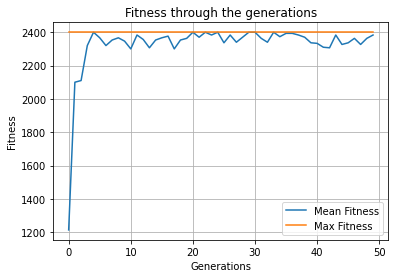

(50, 30)


In [ ]:
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.grid()
plt.show()
print(np.asarray(fitness_history).shape)

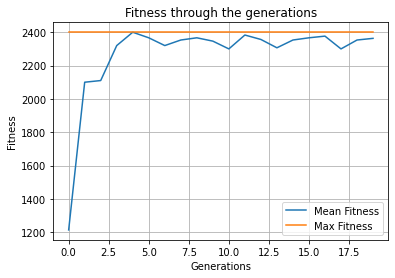

(50, 30)
20
20


In [ ]:


fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(20)), fitness_history_mean[:20], label = 'Mean Fitness')
plt.plot(list(range(20)), fitness_history_max[:20], label = 'Max Fitness')
plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.grid()
plt.show()
print(np.asarray(fitness_history).shape)

print(len(fitness_history_mean[:20]))
print(len(fitness_history_max[:20]))